# Chapter 04: Boltzmann

## Flipping game

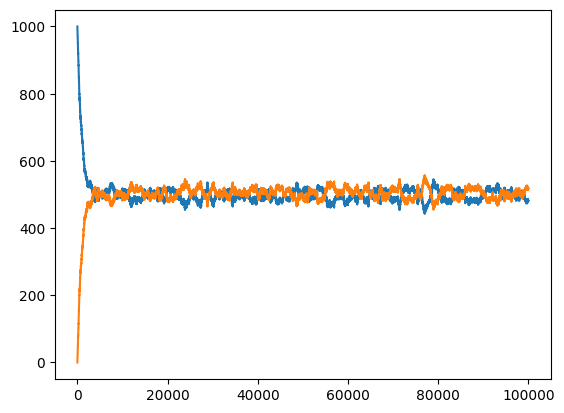

In [3]:
import numpy as np
import matplotlib.pyplot as plt
M = 2 # number of classes
N = 1000 # number of samples
T = 100000 # number of iterations
a = np.zeros((N,1))
b = np.zeros((T,M))
for t in range(T):
    n = np.random.randint(0,N)
    m = np.random.randint(0,M)
    a[n] = m
    for m in range(M):
        b[t,m] = np.sum(a==m)

plt.plot(b)
plt.show()

## Elastic balls in a box

In [4]:
import pygame
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 10
num_balls = 200

# Set up the box properties
Lxn = -300
Lxp = 300
Lyn = -300
Lyp = 300

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))

# Set up the screen
width, height = 800, 800
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Bouncing Balls")

# Set up the colors
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
black = (0, 0, 0)
white = (255, 255, 255)

# Game loop
running = True
clock = pygame.time.Clock()

Ek = []
Ek_hist = []
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Plot the total kinetic energy
    # Ek.append(0.5*np.sum(np.linalg.norm(velocities, axis=1)**2))
    # if len(Ek) % 100 == 0:
    #     clear_output(wait=True)
    #     plt.plot(Ek)
    #     plt.xlabel('Step')
    #     plt.ylabel('Total Kinetic Energy')
    #     plt.show()

    # Plot the kinetic energy histogram
    Ek_hist.append(0.5*np.linalg.norm(velocities, axis=1)**2)
    temperature = 0.5*np.sum(np.linalg.norm(velocities, axis=1)**2)/num_balls
    if len(Ek_hist) > 1000:
        clear_output(wait=True)
        y_hist, bins, _ = plt.hist(np.array(Ek_hist).flatten(), bins=100)
        x_hist = (bins[:-1] + bins[1:])/2
        y_theory = np.exp(-x_hist/temperature)
        y_theory = y_theory/np.sum(y_theory)*np.sum(y_hist)
        plt.xlabel('Energy')
        plt.ylabel('Numerical count')
        plt.plot(x_hist, y_theory, 'r-', label='Maxwell-Boltzmann', linewidth=2)
        plt.legend()
        plt.show()
        Ek_hist = []
       
    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp
            
    # Clear the screen
    screen.fill(black)

    # Draw the balls
    for i in range(num_balls):
        pygame.draw.circle(screen, white, \
        (int(positions[i][0]+width/2), int(positions[i][1]+height/2)), radius)
    
    # Draw the box
    pygame.draw.rect(screen, green, \
    (width/2 + Lxn, height/2 + Lyn, Lxp - Lxn, Lyp - Lyn), 2)

    # Update the display
    pygame.display.flip()
    clock.tick(60)

# Quit the game
pygame.quit()


pygame 2.3.0 (SDL 2.24.2, Python 3.10.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


2024-03-04 21:36:29.986 Python[16547:1765074] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


## Energy distribution

In [5]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 10
num_balls = 200

# Set up the box properties
Lxn = -300
Lxp = 300
Lyn = -300
Lyp = 300

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))

Ek = []
Ek_hist = []
while True:

    # Plot the kinetic energy histogram
    Ek_hist.append(0.5*np.linalg.norm(velocities, axis=1)**2)
    temperature = 0.5*np.sum(np.linalg.norm(velocities, axis=1)**2)/num_balls
    if len(Ek_hist) > 1000:
        clear_output(wait=True)
        y_hist, bins, _ = plt.hist(np.array(Ek_hist).flatten(), bins=100)
        x_hist = (bins[:-1] + bins[1:])/2
        y_theory = np.exp(-x_hist/temperature)
        y_theory = y_theory/np.sum(y_theory)*np.sum(y_hist)
        plt.xlabel('Energy')
        plt.ylabel('Numerical count')
        plt.plot(x_hist, y_theory, 'r-', label='Maxwell-Boltzmann', linewidth=2)
        plt.legend()
        plt.show()
        Ek_hist = []
       
    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp
            


KeyboardInterrupt: 

: 

## Speed distribution

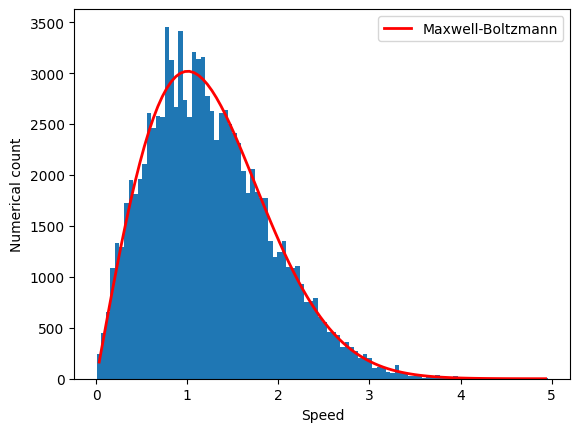

KeyboardInterrupt: 

In [ ]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 10/2
num_balls = 1000

# Set up the box properties
Lxn = -300
Lxp = 300
Lyn = -300
Lyp = 300

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))

speed_hist = []
while True:

    # Plot the kinetic energy histogram
    speed_hist.append(np.linalg.norm(velocities, axis=1))
    temperature = 0.5*np.sum(np.linalg.norm(velocities, axis=1)**2)/num_balls
    if len(speed_hist) > 100:
        clear_output(wait=True)
        y_hist, bins, _ = plt.hist(np.array(speed_hist).flatten(), bins=100)
        x_hist = (bins[:-1] + bins[1:])/2
        y_theory = x_hist*np.exp(-x_hist**2/2/temperature)
        y_theory = y_theory/np.sum(y_theory)*np.sum(y_hist)
        plt.xlabel('Speed')
        plt.ylabel('Numerical count')
        plt.plot(x_hist, y_theory, 'r-', label='Maxwell-Boltzmann', linewidth=2)
        plt.legend()
        plt.show()
        speed_hist = []
       
    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

## Entropy from phase space

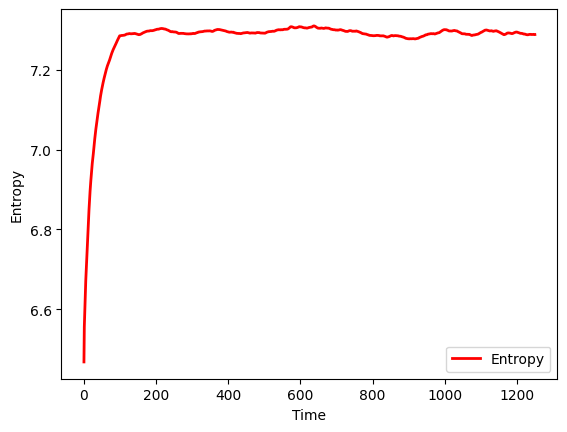

KeyboardInterrupt: 

In [ ]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 5
num_balls = 1000

# Set up the box properties
Lxn = -300
Lxp = 300
Lyn = -300
Lyp = 300

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))


M = 10
Q = 100
x_min = Lxn
y_min = Lyn
x_max = Lxp
y_max = Lyp
v_min = -5
v_max = 5
states = np.zeros((Q,M,M,M,M))

t = 0
entropy = []
while True:

    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        i = int((positions[n,0]-x_min)/(x_max-x_min)*M)
        j = int((positions[n,1]-y_min)/(y_max-y_min)*M)
        k = int((velocities[n,0]-v_min)/(v_max-v_min)*M)
        l = int((velocities[n,1]-v_min)/(v_max-v_min)*M)
        states[q,i,j,k,l] += 1

    # Calculate entropy
    p = np.sum(states, axis=0).flatten()
    p = p/np.sum(p)

    nz = np.nonzero(p)
    entropy.append(-np.sum(p[nz]*np.log(p[nz])))
    
    if (t % 10 == 0):
        clear_output(wait=True)
        plt.plot(np.array(entropy), 'r-', label='Entropy', linewidth=2)
        plt.xlabel('Time')
        plt.ylabel('Entropy')
        plt.legend()
        plt.show()
       
    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

    t += 1

## Sudden expansion

In [ ]:
import pygame
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 5
num_balls = 400

# Set up the box properties
Lxn = -200
Lxp = 200
Lyn = -200
Lyp = 200

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))

# Set up the screen
width, height = 1600, 800
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Bouncing Balls")

# Set up the colors
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
black = (0, 0, 0)
white = (255, 255, 255)

# Game loop
running = True
clock = pygame.time.Clock()

M = 10
Q = 50
x_min = Lxn
y_min = Lyn
x_max = 600
y_max = Lyp
v_min = -6
v_max = 6
states = np.zeros((Q,M,M,M,M))

t = 0
entropy = []
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    if t > 100:
        Lxp = 600
    
    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        i = int((positions[n,0]-x_min)/(x_max-x_min)*M)
        j = int((positions[n,1]-y_min)/(y_max-y_min)*M)
        k = int((velocities[n,0]-v_min)/(v_max-v_min)*M)
        l = int((velocities[n,1]-v_min)/(v_max-v_min)*M)
        states[q,i,j,k,l] += 1

    # Calculate entropy
    p = np.sum(states, axis=0).flatten()
    p = p/np.sum(p)

    nz = np.nonzero(p)
    entropy.append(-np.sum(p[nz]*np.log(p[nz])))

    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

    t += 1
            
    # Clear the screen
    screen.fill(black)

    # Draw the balls
    for i in range(num_balls):
        pygame.draw.circle(screen, white, \
        (int(positions[i][0]+300), int(positions[i][1]+400)), radius)
    
    # Draw the box
    pygame.draw.rect(screen, green, \
    (300 + Lxn, 400 + Lyn, Lxp - Lxn, Lyp - Lyn), 2)

    # Draw entropy
    for i in range(t):
        pygame.draw.circle(screen, red, \
    (1000 + i/10, 600 - int((entropy[i]-entropy[0])*300)), 2)

    # Update the display
    pygame.display.flip()
    clock.tick(60)

# Quit the game
pygame.quit()


KeyboardInterrupt: 

## Isothermal and adiabatic expansion

In [ ]:
import pygame
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 5
num_balls = 400

# Set up the box properties
Lxn = -200
Lxp = 200
Lyn = -200
Lyp = 200

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))

# Set up the screen
width, height = 1600, 800
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Bouncing Balls")

# Set up the colors
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
black = (0, 0, 0)
white = (255, 255, 255)

# Game loop
running = True
clock = pygame.time.Clock()

vLxp = 0

M = 10
Q = 50
x_min = Lxn
y_min = Lyn
x_max = 600
y_max = Lyp
v_min = -5
v_max = 5
states = np.zeros((Q,M,M,M,M))

t = 0
entropy = []
temperature = []
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    Lxp += vLxp*dt
    
    if t > 200:
        vLxp = 0.02

    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        i = int((positions[n,0]-x_min)/(x_max-x_min)*M)
        j = int((positions[n,1]-y_min)/(y_max-y_min)*M)
        k = int((velocities[n,0]-v_min)/(v_max-v_min)*M)
        l = int((velocities[n,1]-v_min)/(v_max-v_min)*M)
        states[q,i,j,k,l] += 1

    # Calculate entropy
    p = np.sum(states, axis=0).flatten()
    p = p/np.sum(p)

    nz = np.nonzero(p)
    entropy.append(-np.sum(p[nz]*np.log(p[nz])))

    # Calculate the temperature
    temperature.append(0.5*np.sum(np.linalg.norm(velocities, axis=1)**2)/num_balls)


    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

        # isothermal expansion
        # if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
        #     velocities[i][0] = -velocities[i][0]

        # adiabatic expansion
        if positions[i][0] > Lxp - radius and velocities[i][0] > vLxp:
            velocities[i][0] = -velocities[i][0] + 2*vLxp

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

    t += 1
            
    # Clear the screen
    screen.fill(black)

    # Draw the balls
    for i in range(num_balls):
        pygame.draw.circle(screen, white, \
        (int(positions[i][0]+300), int(positions[i][1]+400)), radius)
    
    # Draw the box
    pygame.draw.rect(screen, green, \
    (300 + Lxn, 400 + Lyn, Lxp - Lxn, Lyp - Lyn), 2)

    # Draw entropy
    for i in range(t):
        pygame.draw.circle(screen, red, \
        (1000 + i/10, 600 - int((entropy[i]-entropy[0])*300)), 2)

    # Draw temperature
    for i in range(t):
        pygame.draw.circle(screen, green, \
        (1000 + i/10, 100 - int((temperature[i]-temperature[0])*300)), 2)

    # Update the display
    pygame.display.flip()
    clock.tick(30)

# Quit the game
pygame.quit()


KeyboardInterrupt: 

## Carnot cycle

Thermalization complete


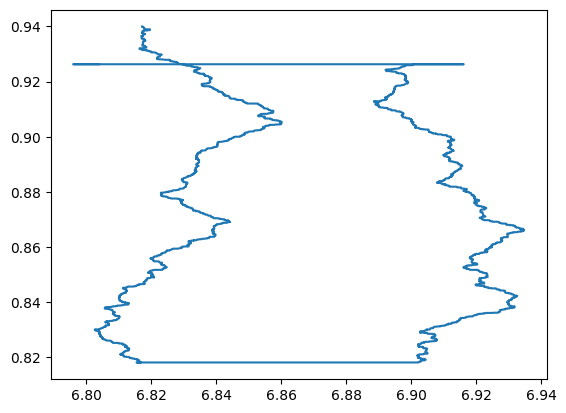

In [ ]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 5
num_balls = 200

# Set up the box properties
Lxn = -200
Lxp = 200
Lyn = -200
Lyp = 200

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))

v_wall = 0.01

M = 10
Q = 1000
N_cycle = 20000
x_min = Lxn
y_min = Lyn
x_max = Lxp + v_wall*N_cycle/2*dt
y_max = Lyp
v_min = -6
v_max = 6
states = np.zeros((Q,M,M,M,M))

for t in range(1000):
    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        i = int((positions[n,0]-x_min)/(x_max-x_min)*M)
        j = int((positions[n,1]-y_min)/(y_max-y_min)*M)
        k = int((velocities[n,0]-v_min)/(v_max-v_min)*M)
        l = int((velocities[n,1]-v_min)/(v_max-v_min)*M)
        states[q,i,j,k,l] += 1

    # Update ball positions
    positions += velocities*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

print('Thermalization complete')


entropy = []
temperature = []

for t in range(2*N_cycle):
    
    stage = int((t % N_cycle)/N_cycle*4)

    if stage == 0 or stage == 1:
        vLxp = v_wall
    else:
        vLxp = -v_wall

    Lxp += vLxp*dt

    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        i = int((positions[n,0]-x_min)/(x_max-x_min)*M)
        j = int((positions[n,1]-y_min)/(y_max-y_min)*M)
        k = int((velocities[n,0]-v_min)/(v_max-v_min)*M)
        l = int((velocities[n,1]-v_min)/(v_max-v_min)*M)
        states[q,i,j,k,l] += 1

    # Calculate entropy
    p = np.sum(states, axis=0).flatten()
    p = p/np.sum(p)

    nz = np.nonzero(p)
    entropy.append(-np.sum(p[nz]*np.log(p[nz])))

    # Calculate the temperature
    temperature.append(0.5*np.sum(np.linalg.norm(velocities, axis=1)**2)/num_balls)

    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

        if stage == 0 or stage == 2:
            # isothermal expansion (or compression)
            if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
                velocities[i][0] = -velocities[i][0]
        else:
            # adiabatic expansion (or compression)
            if positions[i][0] > Lxp - radius and velocities[i][0] > vLxp:
                velocities[i][0] = -velocities[i][0] + 2*vLxp

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

plt.plot(entropy[-N_cycle:],temperature[-N_cycle:])

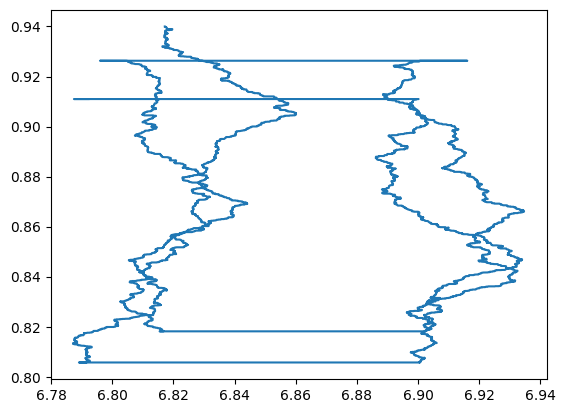

: 

In [ ]:
plt.plot(entropy,temperature)

## P-V diagram

Thermalization complete


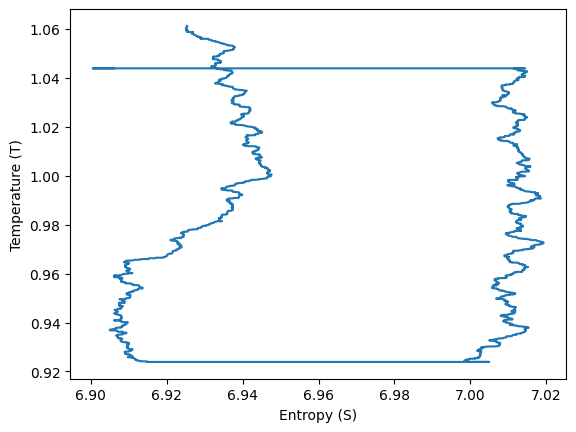

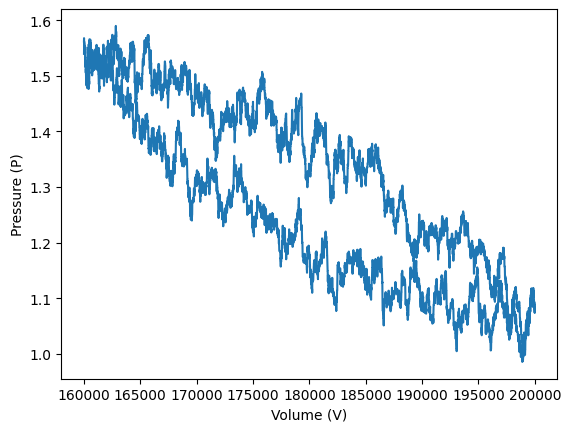

In [ ]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 5
num_balls = 200

# Set up the box properties
Lxn = -200
Lxp = 200
Lyn = -200
Lyp = 200

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))

v_wall = 0.01

M = 10
Q = 1000
N_cycle = 20000
x_min = Lxn
y_min = Lyn
x_max = Lxp + v_wall*N_cycle/2*dt
y_max = Lyp
v_min = -6
v_max = 6
states = np.zeros((Q,M,M,M,M))
q_pressures = np.zeros((Q,1))

for t in range(1000):
    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        i = int((positions[n,0]-x_min)/(x_max-x_min)*M)
        j = int((positions[n,1]-y_min)/(y_max-y_min)*M)
        k = int((velocities[n,0]-v_min)/(v_max-v_min)*M)
        l = int((velocities[n,1]-v_min)/(v_max-v_min)*M)
        states[q,i,j,k,l] += 1

    # Update ball positions
    positions += velocities*dt

    q_pressures[q] = 0

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
            q_pressures[q] += 2*velocities[i][0]/(Lyp - Lyn)
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            velocities[i][0] = -velocities[i][0]

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

print('Thermalization complete')


entropy = []
temperature = []
pressure = []
volume = []

for t in range(N_cycle):
    
    stage = int((t % N_cycle)/N_cycle*4)
    volume.append((Lxp - Lxn)*(Lyp-Lyn))

    if stage == 0 or stage == 1:
        vLxp = v_wall
    else:
        vLxp = -v_wall

    Lxp += vLxp*dt

    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        i = int((positions[n,0]-x_min)/(x_max-x_min)*M)
        j = int((positions[n,1]-y_min)/(y_max-y_min)*M)
        k = int((velocities[n,0]-v_min)/(v_max-v_min)*M)
        l = int((velocities[n,1]-v_min)/(v_max-v_min)*M)
        states[q,i,j,k,l] += 1

    # Calculate entropy
    p = np.sum(states, axis=0).flatten()
    p = p/np.sum(p)

    nz = np.nonzero(p)
    entropy.append(-np.sum(p[nz]*np.log(p[nz])))

    # Calculate the temperature
    temperature.append(0.5*np.sum(np.linalg.norm(velocities, axis=1)**2)/num_balls)

    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Calculate pressure
    q_pressures[q] = 0

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            velocities[i][0] = -velocities[i][0]
            q_pressures[q] += 2*velocities[i][0]/(Lyp - Lyn)
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            velocities[i][1] = -velocities[i][1]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            velocities[i][1] = -velocities[i][1]

        if stage == 0 or stage == 2:
            # isothermal expansion (or compression)
            if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
                velocities[i][0] = -velocities[i][0]
        else:
            # adiabatic expansion (or compression)
            if positions[i][0] > Lxp - radius and velocities[i][0] > vLxp:
                velocities[i][0] = -velocities[i][0] + 2*vLxp

    pressure.append(np.sum(q_pressures, axis=0))

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

plt.plot(entropy[-N_cycle:],temperature[-N_cycle:])
plt.xlabel('Entropy (S)')
plt.ylabel('Temperature (T)')
plt.show()

plt.plot(volume[-N_cycle:],pressure[-N_cycle:])
plt.xlabel('Volume (V)')
plt.ylabel('Pressure (P)')
plt.show()

Cycle in progress
99.375


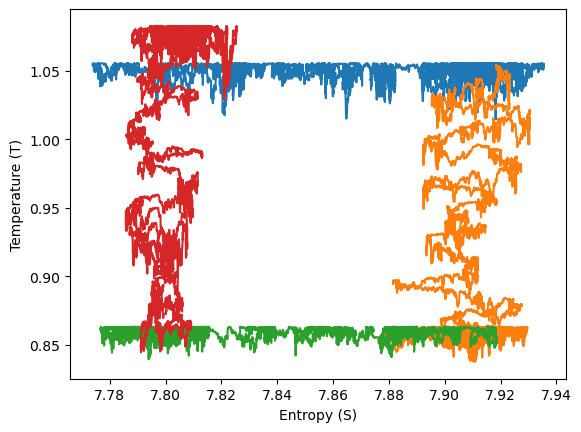

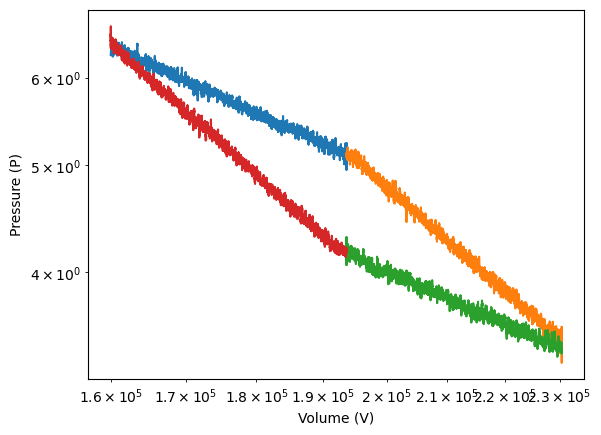

In [1]:
import numpy as np
from IPython.display import clear_output
import random
import matplotlib.pyplot as plt

dt = 1

# Set up the ball properties
radius = 5
num_balls = 200

# Set up the box properties
Lxn = -200
Lxp = 200
Lyn = -200
Lyp = 200

x = np.random.uniform(Lxn+radius, Lxp-radius, num_balls)
y = np.random.uniform(Lyn+radius, Lyp-radius, num_balls)
positions = np.column_stack((x, y))

vx = np.random.randn(num_balls)
vy = np.random.randn(num_balls)
velocities = np.column_stack((vx, vy))

v_wall = 0.001

M = 10
Q = 1000
N_cycle = 160000
x_min = Lxn - v_wall*N_cycle*dt
y_min = Lyn - v_wall*N_cycle*dt
x_max = Lxp + v_wall*N_cycle*dt
y_max = Lyp + v_wall*N_cycle*dt
v_min = -3.3
v_max = 3.3
xl = np.linspace(x_min, x_max, M)
yl = np.linspace(y_min, y_max, M)
vl = np.linspace(v_min, v_max, M)
dx = xl[1] - xl[0]
dy = yl[1] - yl[0]
dv = vl[1] - vl[0]
states = np.zeros((Q,M,M,M,M))
q_pressures = np.zeros((Q,1))

for t in range(10000):
    # clear_output(wait=True)
    # print('Thermalization in progress')
    # print(100*t/1000)

    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        px = np.exp(-(positions[n,0]-xl)**2/2/(dx)**2)
        py = np.exp(-(positions[n,1]-yl)**2/2/(dy)**2)
        vx = np.exp(-(velocities[n,0]-vl)**2/2/(dv)**2)
        vy = np.exp(-(velocities[n,1]-vl)**2/2/(dv)**2)

        d1 = np.outer(px,py)
        d2 = np.outer(vx,vy)
        states[q] += d1[np.newaxis,np.newaxis,:,:]*d2[:,:,np.newaxis,np.newaxis]

    # Update ball positions
    positions += velocities*dt

    q_pressures[q] = 0

    # Check for collisions with walls
    for i in range(num_balls):
        if positions[i][0] < Lxn + radius and velocities[i][0] < 0:
            q_pressures[q] += -2*velocities[i][0]/(Lyp - Lyn)
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] < Lyn + radius and velocities[i][1] < 0:
            q_pressures[q] += -2*velocities[i][1]/(Lxp - Lxn)
            velocities[i][1] = -velocities[i][1]
        if positions[i][0] > Lxp - radius and velocities[i][0] > 0:
            q_pressures[q] += 2*velocities[i][0]/(Lyp - Lyn)
            velocities[i][0] = -velocities[i][0]
        if positions[i][1] > Lyp - radius and velocities[i][1] > 0:
            q_pressures[q] += 2*velocities[i][1]/(Lxp - Lxn)
            velocities[i][1] = -velocities[i][1]
        

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp


entropy = []
temperature = []
pressure = []
volume = []

for t in range(N_cycle):
    if t % 1000 == 0:
        clear_output(wait=True)
        print('Cycle in progress')
        print(100*t/N_cycle)
    
    stage = int((t % N_cycle)/N_cycle*8)
    volume.append((Lxp - Lxn)*(Lyp-Lyn))

    if stage == 0 or stage == 2:
        vLxp = v_wall
        vLxn = -v_wall
        vLyp = v_wall
        vLyn = -v_wall
    elif stage == 4 or stage == 6:
        vLxp = -v_wall
        vLxn = v_wall
        vLyp = -v_wall
        vLyn = v_wall
    else:
        vLxp = 0
        vLxn = 0
        vLyp = 0
        vLyn = 0

    Lxp += vLxp*dt
    Lxn += vLxn*dt
    Lyp += vLyp*dt
    Lyn += vLyn*dt

    q = t % Q

    states[q] = 0
    for n in range(num_balls):
        px = np.exp(-(positions[n,0]-xl)**2/2/(dx)**2)
        py = np.exp(-(positions[n,1]-yl)**2/2/(dy)**2)
        vx = np.exp(-(velocities[n,0]-vl)**2/2/(dv)**2)
        vy = np.exp(-(velocities[n,1]-vl)**2/2/(dv)**2)
        
        d1 = np.outer(px,py)
        d2 = np.outer(vx,vy)
        states[q] += d1[np.newaxis,np.newaxis,:,:]*d2[:,:,np.newaxis,np.newaxis]


    # Calculate entropy
    p = np.sum(states, axis=0).flatten()
    p = p/np.sum(p)
    entropy.append(-np.sum(p*np.log(p)))

    # nz = np.nonzero(p)
    # entropy.append(-np.sum(p[nz]*np.log(p[nz])))

    # Calculate the temperature
    vt = velocities - np.mean(velocities, axis=0)
    temperature.append(0.5*np.sum(np.linalg.norm(vt, axis=1)**2)/num_balls)

    # Sort with respect to x
    sort_index = np.argsort(positions[:,0])
    positions = positions[sort_index]
    velocities = velocities[sort_index]

    # Update ball positions
    positions += velocities*dt

    # Calculate pressure
    q_pressures[q] = 0

    # Check for collisions with walls
    for i in range(num_balls):
        
        if positions[i][0] > Lxp - radius and velocities[i][0] > vLxp:
            q_pressures[q] += (2*velocities[i][0])/(Lyp - Lyn)
            if stage == 0 or stage == 4:
                velocities[i][0] = -velocities[i][0]
            else:
                velocities[i][0] = -velocities[i][0] + 2*vLxp
                

        if positions[i][0] < Lxn + radius and velocities[i][0] < vLxn:
            q_pressures[q] += (-2*velocities[i][0])/(Lyp - Lyn)
            if stage == 0 or stage == 4:
                velocities[i][0] = -velocities[i][0]
            else:
                velocities[i][0] = -velocities[i][0] + 2*vLxn
                

        if positions[i][1] > Lyp - radius and velocities[i][1] > vLyp:
            q_pressures[q] += (2*velocities[i][1])/(Lxp - Lxn)
            if stage == 0 or stage == 4:
                velocities[i][1] = -velocities[i][1]
            else:
                velocities[i][1] = -velocities[i][1] + 2*vLyp
                
        
        if positions[i][1] < Lyn + radius and velocities[i][1] < vLyn:
            q_pressures[q] += (-2*velocities[i][1])/(Lxp - Lxn)
            if stage == 0 or stage == 4:
                velocities[i][1] = -velocities[i][1]
            else:
                velocities[i][1] = -velocities[i][1] + 2*vLyn
                
            
    pressure.append(np.sum(q_pressures, axis=0))

    # Check for collisions between balls
    for i in range(num_balls):
        for j in range(i+1, num_balls):
            if (positions[j,0] - positions[i,0] > 2*radius):
                break
            else:
                rp = positions[j] - positions[i]
                nrp = np.linalg.norm(rp)
                if nrp < 2*radius:
                    rv = velocities[j] - velocities[i]
                    if np.dot(rv,rp) < 0:
                        vp = np.dot(rv,rp)*rp/nrp**2
                        velocities[i] += vp
                        velocities[j] -= vp

for n in range(4):
    plt.plot(entropy[n*N_cycle//4:(n+1)*N_cycle//4],temperature[n*N_cycle//4:(n+1)*N_cycle//4])
plt.xlabel('Entropy (S)')
plt.ylabel('Temperature (T)')
plt.show()

for n in range(4):
    plt.loglog(volume[n*N_cycle//4:(n+1)*N_cycle//4],pressure[n*N_cycle//4:(n+1)*N_cycle//4])
plt.xlabel('Volume (V)')
plt.ylabel('Pressure (P)')
plt.show()